
# K-Means Clustering

[(11, 9), (18, 25), (2, 17), (11, 10), (15, 26), (6, 17), (6, 6), (17, 25), (1, 17), (9, 10), (15, 26), (4, 15), (11, 8), (15, 23), (5, 15), (9, 7), (16, 23), (6, 19), (8, 6), (18, 23), (7, 19), (10, 10), (16, 22), (6, 20), (8, 5), (16, 23), (1, 15), (10, 7), (18, 20), (2, 16)]
Length of list is:  30


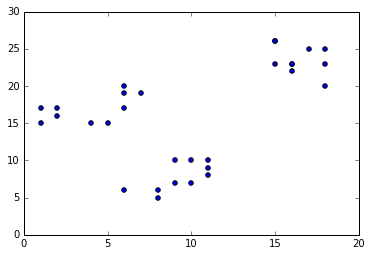

In [3]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
import math

cents = [(5,5), (15,20), (1,15)]
points = []
for i in range(10):
    for c in cents:
        points.append(tuple([c[0]+random.randrange(7),c[1]+random.randrange(7)]))

print(points)
print("Length of list is: ", len(points))

plt.scatter([x[0] for x in points],[x[1] for x in points])
plt.show()

In [4]:
k = 3

def chooseCentroids(k,points):
    centroids = random.sample(points,k) #random.sample(sequence, len) returns unique len items from a sequence
    print(centroids)

    cluster_keeper = {}
    for c in centroids:
        cluster_keeper[c] = []
    return cluster_keeper


In [5]:
chooseCentroids(k,points)

[(18, 25), (16, 22), (15, 26)]


{(15, 26): [], (16, 22): [], (18, 25): []}

In [6]:
def edist(p1,p2):
    tot = 0
    for i in range(len(p1)): #three times in this case as we are having 3 centroids
        diff = (p1[i]-p2[i])**2
        tot = tot + diff
    return math.sqrt(tot)

In [7]:
def createClusters(k, points, ck, it):
    for i in range(it):
        for p in points:#(x,y)coordinate
            minC = None
            minD = 99999
            for c in ck:#cluster point
                dist = edist(c,p)#returns total difference b/w the p point and centroid points
                #print(dist)
                if dist < minD:
                    minC = c
                    minD = dist
            ck[minC].append(p)#new centroid and the value
        newck = {}
        for k in ck:
            #finding new centroid by again averaging x and y values
            x = sum([x[0] for x in ck[k]])/len(ck[k])
            y = sum([x[1] for x in ck[k]])/len(ck[k])
            newck[(x,y)] = []
        if i < it-1:
            ck = newck

    return ck


[(6, 19), (18, 25), (16, 23)]
{(16.25, 25.5): [(18, 25), (15, 26), (17, 25), (15, 26)], (6.65, 12.4): [(11, 9), (2, 17), (11, 10), (6, 17), (6, 6), (1, 17), (9, 10), (4, 15), (11, 8), (5, 15), (9, 7), (6, 19), (8, 6), (7, 19), (10, 10), (6, 20), (8, 5), (1, 15), (10, 7), (2, 16)], (16.5, 22.333333333333332): [(15, 23), (16, 23), (18, 23), (16, 22), (16, 23), (18, 20)]}
K: (16.25, 25.5)
K: (6.65, 12.4)
K: (16.5, 22.333333333333332)


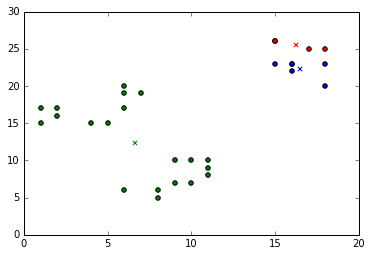

In [8]:
ck = createClusters(k,points,chooseCentroids(k,points),14)
print(ck)
clrs = 'rgbyp'

for i,k in enumerate(ck):
    print("K:",k)
    plt.scatter(k[0],k[1],c=clrs[i],marker='x')
    plt.scatter([x[0] for x in ck[k]],[x[1] for x in ck[k]],c=clrs[i],marker='o')

plt.show()


## Or from SciKit Learn

label:  [2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0]
Centroids [[  4.   17. ]
 [ 16.4  23.6]
 [  9.3   7.8]]


array([2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 0, 2, 1, 0], dtype=int32)

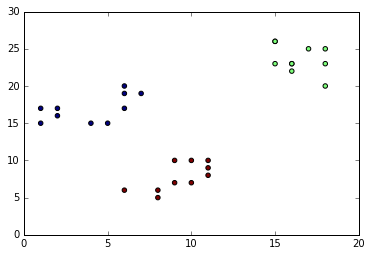

In [9]:
from sklearn.cluster import KMeans
kmm = KMeans(3,n_init=30)
kmm.fit(points)
kmm_label = kmm.predict(points)
print("label: ", kmm_label)
centroids = kmm.cluster_centers_
print("Centroids",centroids)
plt.scatter([x[0] for x in points], [x[1] for x in points], c=kmm_label)
kmm_label

## Two projects

1.  Try the hand coded algorithm on the iris data.  Compare and figure out how well it clusters the different varieties of iris into the correct cluster.
2.  In image processing

    1.  Choose an image
    2.  Apply KMeans clustering to the color tuples
    3.  display the original image
    4.  create a new image using the centroids to stand in for the colors you chose.


In [10]:
from sklearn.datasets import load_iris
data = load_iris()

In [11]:
iris = [tuple(x) for x in data.data]
#print("Iris tuple: ", iris)
chooseCentroids(3,iris) #returns centroids and cluster keeper

[(6.5, 3.0, 5.2000000000000002, 2.0), (5.5, 4.2000000000000002, 1.3999999999999999, 0.20000000000000001), (6.0, 2.2000000000000002, 4.0, 1.0)]


{(5.5, 4.2000000000000002, 1.3999999999999999, 0.20000000000000001): [],
 (6.0, 2.2000000000000002, 4.0, 1.0): [],
 (6.5, 3.0, 5.2000000000000002, 2.0): []}

[(5.7000000000000002, 2.6000000000000001, 3.5, 1.0), (5.0999999999999996, 3.5, 1.3999999999999999, 0.20000000000000001), (5.5, 2.3999999999999999, 3.7999999999999998, 1.1000000000000001)]


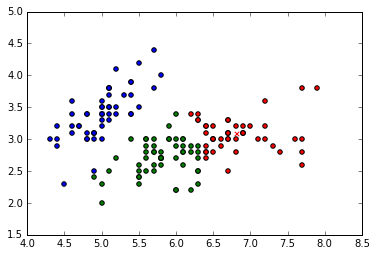

r: 46
g: 53
b: 51


In [12]:

ck = createClusters(3,iris,chooseCentroids(3,iris),30)
#print(ck)
clrs = 'rgbyp'
r = 0
g = 0
b = 0

for i,k in enumerate(ck):
    plt.scatter(k[0],k[1],c=clrs[i],marker='x')
    
    plt.scatter([x[0] for x in ck[k]],[x[1] for x in ck[k]],c=clrs[i],marker='o')
    for x in ck[k]:
        if clrs[i] == "r":
            r+=1
        elif clrs[i] == "g":
            g+=1
        else:
            b+=1
        
              

plt.show()
print("r:", r)
print("g:", g)
print("b:", b)

### Observation: setosa has accurate clustering while little bit offside for virginica and versicolor

#### Sklearn

o: 62
z: 50
t: 38


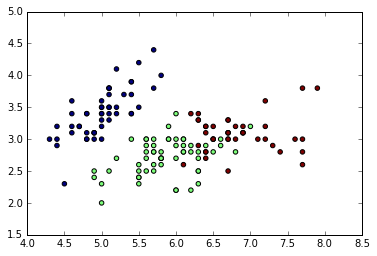

In [13]:
from sklearn.cluster import KMeans
kmm = KMeans(3,n_init=30)#n_init Number of time the k-means algorithm will be run with different centroid seeds.
kmm.fit(iris)
kmm_label = kmm.predict(iris)
z = 0
o = 0
t= 0
for i in kmm_label:
    if i == 1:
        o+=1
    elif i == 0:
        z += 1
    else:
        t += 1
plt.scatter([x[0] for x in iris], [x[1] for x in iris], c=kmm_label)
kmm_label
print("o:", o)
print("z:", z)
print("t:", t)


### Setosa has accurate clustering

(427, 640, 4)


/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


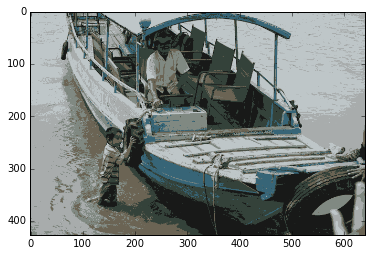

In [22]:
from PIL import Image
import numpy as np
im = Image.open('delta.png')
#print(im)
data = np.array(im)
print(data.shape)
#print(data)
x = data.reshape(427*640,4)
#print(x)
kmm = KMeans(7,n_init=2)
kmm.fit(x)
kmm_label = kmm.predict(x)
#print("Kmm_label: ", kmm_label)
centroids = kmm.cluster_centers_
#print("Centroids: ", centroids)
#predict_labels = kmm.predict(x)
#print("Predicted Labels: ", predict_labels)
for i,t in enumerate(x):
    x[i] = kmm.cluster_centers_[kmm.labels_[i]]

y = x.reshape(427,640,4)
#print(y)
newim = Image.fromarray(y)
plt.imshow(newim)

In [19]:
ls = [[1,2,3,4],
     [5,6,7,8],
     [9,10,11,12],
     [12,14,15,16]]
new_ls = []
for i in ls:
    for j in range(len(i)):
        new_ls.append(i[j])
print(new_ls)
data = np.array(new_ls)
print(data)
data = data.reshape(4,4)
print(data) 
    
#new_x = []
#for i in predict_labels:
    #for j in centroids:
        #new_x.append(j[i])
#print(new_x)

#y = x.reshape(427,640,4)
#newim = Image.fromarray(y)
#plt.imshow(newim)




[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 14, 15, 16]
[ 1  2  3  4  5  6  7  8  9 10 11 12 12 14 15 16]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [12 14 15 16]]


## Now reshape the data and use plt.imshow